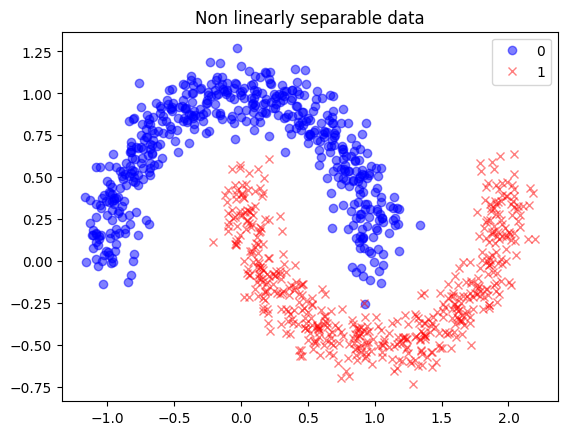

In [10]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)


def plot_data():
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    plt.title('Non linearly separable data')
    
plot_data()

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def create_model():
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.fit(X_train, y_train, epochs=200, verbose=0)

319/319 [==============================] - 0s 267us/step


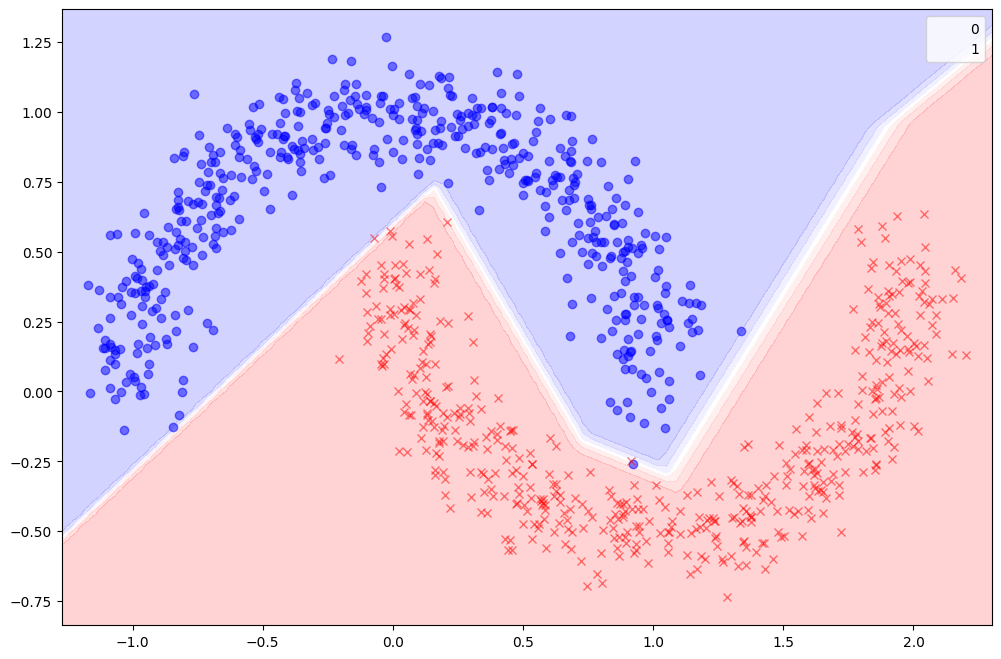

In [88]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    # If instead of probability you want to get 0 or 1
    # The Plot will be very crisp since there will only be 2 coutours
    # cc = (cc > 0.5).astype("int32")

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    return c
    
cc = plot_decision_boundary(model, X, y)
